# Computational Social Science Project #3
Group number: 1

Group members: Benjamin Fields, Ernesto Gutierrez, and Nehal Eldeeb

Semester: Fall 2021

## 1. Introduction

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

#This is importing the required packages and functions for running all three models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
%matplotlib inline
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

## 2. Data Pre-Processing & Cleaning

In [2]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                               low_memory=False)

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014.csv", 
                                            low_memory=False)

In [3]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

Inspection_ID Inspection_Date                      DBA_Name  \
0         269961      2013-01-31                    SEVEN STAR   
1         507211      2011-10-18                  PANERA BREAD   
2         507212      2011-10-18      LITTLE QUIAPO RESTAURANT   
3         507216      2011-10-19  SERGIO'S TAQUERIA PIZZA INC.   
4         507219      2011-10-20         TARGET STORE # T-2079   

                   AKA_Name  License  Facility_Type             Risk  \
0                SEVEN STAR    30790  Grocery Store     Risk 3 (Low)   
1              PANERA BREAD  1475890     Restaurant    Risk 1 (High)   
2  LITTLE QUIAPO RESTAURANT  1740130     Restaurant    Risk 1 (High)   
3   SERGIO'S TAQUERIA PIZZA  1447363     Restaurant    Risk 1 (High)   
4                    TARGET  1679459     Restaurant  Risk 2 (Medium)   

                 Address     City State      Zip Inspection_Type Results  \
0       3352 N BROADWAY   CHICAGO    IL  60657.0         Canvass    Pass   
1    6059 N LINCOLN AVE   CHICAGO    IL  60659.0         Canvass    Pass   
2   6259 N MCCORMICK RD   CHICAGO    IL  60659.0         Canvass    Fail   
3  3253 W BRYN MAWR AVE   CHICAGO    IL  60659.0         Canvass    Pass   
4   2112 W PETERSON AVE   CHICAGO    IL  60659.0         Canvass    Fail   

    Latitude  Longitude                                  Location  \
0  41.943359 -87.644999  (41.943359344775146, -87.64499875300952)   
1  41.991919 -87.709631   (41.99191947239194, -87.70963133440333)   
2  41.995632 -87.712707   (41.99563177556418, -87.71270678169132)   
3  41.982933 -87.710982  (41.982933189164974, -87.71098225381141)   
4  41.990729 -87.682979   (41.99072921796059, -87.68297945359863)   

  Facility_Type_Clean  criticalCount  seriousCount  minorCount  pass_flag  \
0               Other              0             0           2          1   
1          Restaurant              0             0           3          1   
2          Restaurant              0             2           6          0   
3          Restaurant              0             0           6          1   
4          Restaurant              0             2           6          0   

   fail_flag  pastFail  pastCritical  pastSerious  pastMinor  timeSinceLast  \
0          0         0             0            0          0            2.0   
1          0         0             0            0          0            2.0   
2          1         0             0            0          0            2.0   
3          0         0             0            0          0            2.0   
4          1         0             0            0          0            2.0   

   firstRecord                ID  LICENSE_ID  ACCOUNT_NUMBER  \
0            1    30790-20110416   2081412.0         63759.0   
1            1  1475890-20110416   2081695.0        207283.0   
2            1  1740130-20110216   2070145.0          3107.0   
3            1  1447363-20110216   2071895.0        270993.0   
4            1  1679459-20100216   2009972.0         15538.0   

                     LEGAL_NAME        DOING_BUSINESS_AS_NAME  \
0            VIRGINIA DELA ROSA                    SEVEN STAR   
1                   PANERA, LLC                  PANERA BREAD   
2                ENELITA GARCIA      LITTLE QUIAPO RESTAURANT   
3  SERGIO'S TAZUERIA PIZZA INC.  SERGIO'S TAQUERIA PIZZA INC.   
4            TARGET CORPORATION         TARGET STORE # T-2079   

                 ADDRESS     CITY STATE  ZIP_CODE  WARD  PRECINCT  \
0    3352 N BROADWAY   1  CHICAGO    IL   60657.0  44.0      33.0   
1  6059 N LINCOLN AVE  C  CHICAGO    IL   60659.0  50.0      23.0   
2    6259 N MCCORMICK RD  CHICAGO    IL   60659.0  50.0      25.0   
3   3253 W BRYN MAWR AVE  CHICAGO    IL   60659.0  39.0      48.0   
4    2112 W PETERSON AVE  CHICAGO    IL   60659.0  40.0      18.0   

  WARD_PRECINCT  POLICE_DISTRICT  LICENSE_CODE        LICENSE_DESCRIPTION  \
0         44-33             19.0        1006.0  Retail Food Establishment   
1         50-23   

In [4]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                'LICENSE_TERM_START_DATE',
                                                'LICENSE_TERM_EXPIRATION_DATE',
                                                'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

In [7]:
# Check shape of the data 
chicago_inspections_2011_to_2013.shape

(17677, 42)

### Visualization

What do inspections look like over time?

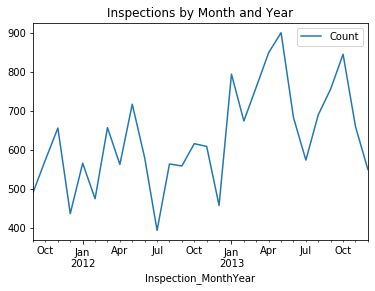

In [8]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year")

What do the results look like? 

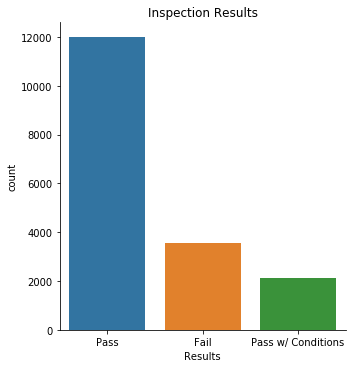

In [9]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate by facility type?

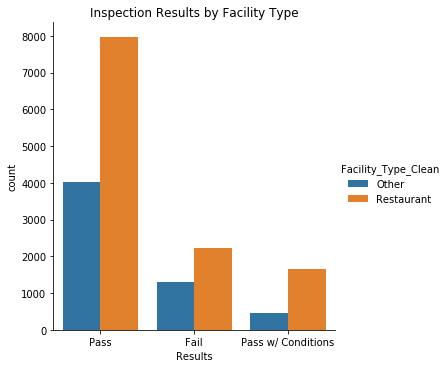

In [10]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

### Preprocess Data

In [11]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [12]:
chicago_inspections_2011_to_2013

Facility_Type  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                                Grocery Store   
507211        PANERA BREAD                                 Restaurant   
507212        LITTLE QUIAPO RESTAURANT                     Restaurant   
507216        SERGIO'S TAQUERIA PIZZA INC.                 Restaurant   
507219        TARGET STORE # T-2079                        Restaurant   
...                                                               ...   
1393258       CIAO BELLA CAFE                              Restaurant   
1395218       Christian Fields Style  Bar                  Restaurant   
1395224       W CHICAGO - LAKESHORE                        Restaurant   
1441493       ADVOCATE ILLINOIS MASONIC MEDICAL CENTER     Restaurant   
1493801       SODEXHO                                      Restaurant   

                                                                   Risk  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                   Risk 3 (Low)   
507211        PANERA BREAD                                Risk 1 (High)   
507212        LITTLE QUIAPO RESTAURANT                    Risk 1 (High)   
507216        SERGIO'S TAQUERIA PIZZA INC.                Risk 1 (High)   
507219        TARGET STORE # T-2079                     Risk 2 (Medium)   
...                                                                 ...   
1393258       CIAO BELLA CAFE                             Risk 1 (High)   
1395218       Christian Fields Style  Bar               Risk 2 (Medium)   
1395224       W CHICAGO - LAKESHORE                       Risk 1 (High)   
1441493       ADVOCATE ILLINOIS MASONIC MEDICAL CENTER    Risk 1 (High)   
1493801       SODEXHO                                     Risk 1 (High)   

                                                       Inspection_Type  \
Inspection_ID DBA_Name                                                   
269961        SEVEN STAR                                       Canvass   
507211        PANERA BREAD                                     Canvass   
507212        LITTLE QUIAPO RESTAURANT                         Canvass   
507216        SERGIO'S TAQUERIA PIZZA INC.                     Canvass   
507219        TARGET STORE # T-2079                            Canvass   
...                                                                ...   
1393258       CIAO BELLA CAFE                                  Canvass   
1395218       Christian Fields Style  Bar                      Canvass   
1395224       W CHICAGO - LAKESHORE                            Canvass   
1441493       ADVOCATE ILLINOIS MASONIC MEDICAL CENTER         Canvass   
1493801       SODEXHO                                          Canvass   

                                                                   Results  \
Inspection_ID DBA_Name                                                       
269961        SEVEN STAR                                              Pass   
507211        PANERA BREAD                                            Pass   
507212        LITTLE QUIAPO RESTAURANT                                Fail   
507216        SERGIO'S TAQUERIA PIZZA INC.                            Pass   
507219        TARGET STORE # T-2079                                   Fail   
...                                                                    ...   
1393258       CIAO BELLA CAFE                                         Pass   
1395218       Christian Fields Style  Bar                             Pass   
1395224       W CHICAGO - LAKESHORE                     Pass w/ Conditions   
1441493       ADVOCATE ILLINOIS MASONIC MEDICAL CENTER                Pass   
1493801       SODEXHO                                                 Pass   

                                                       Facility_Type_Clean  \
Inspection_ID DBA_Name                                                    

In [13]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']

## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)

# Look at extended df
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

## 3. Fit Models

In [14]:
#Set the seed
np.random.seed(12345)

### 3.1 Data Splitting

In [15]:
#Create the training and validation sets
X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size = .80, test_size=0.20, stratify=y)

In [16]:
print("Shape of X_train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_validate is", X_validate.shape)
print("Shape of y_validate is", y_validate.shape)

Shape of X_train is (12248, 2042)
Shape of y_train is (12248, 1)
Shape of X_validate is (3063, 2042)
Shape of y_validate is (3063, 1)


### 3.2 Model 1 - Logistic Regression

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

##### Describe the basic logic and assumptions underlying each model, it's pros/cons, and why it is a plausible choice for this problem. 

This particular model is interested in finding the association between variables and a categorical outcome. It technically is a linear model using ordinary least squares, but the variables do not need to have linear relationships with each other; they also do not need to be normally distributed or scalable (as in ranked by some kind of ratio or interval). It is great because when dealing with quantitative variables, you can transform the outcome variable in different ways or you can take a linear relationship and find a useful way to think about it. For our particular project, we are looking at the probability that a restaurant will pass or fail an inspection and categorizing them. This gives us a meaningful way of understanding the probabilities in a way that another model like a decision tree could not. 

The assumptions for logistic regression are that none of the variables are similar nor do they have an association with each, there are no extreme outliers (which is what visualizing the data and removing these is for), that the sample size is relatively large (we have thousands of observations), that the outcome has to be categorical (for us based on cutoffs at different probabilities), and that variables must be related to log odds of the outcome (due to it being ordinary least squares). 

One of the pros of this method is that this is easier to implement in comparison to other models and provides a measure of prediction and direction. It also works quickly on new data, and is not as easily inclined to overfitting. Also, it does well with feature importance as it can measure coefficients compared to something like a decision tree. The cons of this model are that there has to be more observations than features, linear boundaries are created, you can only look at discrete functions, and it is hard to use on very complex relationships.

We chose this as one of our three models because it works well with the type of data we are working with, fulfills most of the assumptions, and we can use additional tools like dimension-reduction analysis to help even more when it comes to feature selection. We can categorize around figuring out which restaurants will pass or fail an inspection, we have a great sample size, and we won’t have problems with overfitting which may arise in a different model (like support vector machines). One issue with this model that we may have is that we cannot create a reliable cutoff that makes perfect sense - a restaurant could have a 53% chance of passing an inspection, but it is not clear whether or not this is categorically different from only having a .47% chance of passing the inspection. There is not an easily-identifiable way to look at it.

In [17]:
#Logistic Regression Model
logit_reg = LogisticRegression()
logit_model = logit_reg.fit(X_train, y_train.ravel())
log_pred = logit_model.predict(X_validate)

In [18]:
#Hyperparameter tuning for logistic model
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
              'C': np.arange(.1, 1, .1),
              'fit_intercept': ['True', 'False'],
              'solver': ['liblinear', 'saga']}

logit_grid = GridSearchCV(logit_reg, param_grid, cv=3)
logit_grid.fit(X_train, y_train)

best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

print("Optimal hyperparameters for Logit:", logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

Optimal hyperparameters for Logit: {'C': 0.1, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Validation Accuracy 0.9187071498530852


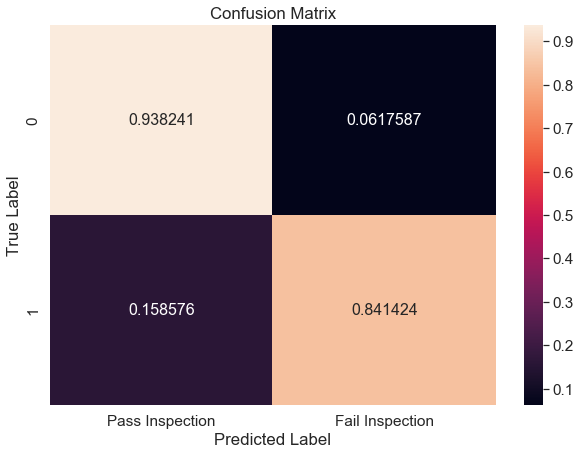

In [19]:
#Creating a Confusion Matrix
cf_matrix = confusion_matrix(y_validate, best_logit_pred, normalize = "true")
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))
df_cm = df_cm.rename(index=str, columns={0: "Pass Inspection", 1: "Fail Inspection"})
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 3.2 Model 2 - Support Vector Machine

##### Describe the basic logic and assumptions underlying each model, it's pros/cons, and why it is a plausible choice for this problem. 

The Support Vector Machine (SVM) is a linear model that creates hyperplanes to separate data into different classes. These hyperplanes use margins of error to determine the correct boundaries, and can either be linear or non-linear in the case of very complex data (for example, imagine a circle of observations with a significant amount of space between it and another ring of observations). Its assumptions are that the data are assumed to be independent and identically distributed data.

The pros are that the model works well with data that have a clear margin of separation, data with high-dimensional spaces, when the number of dimensions is higher than the number of observations and the model uses a subset of training points in the decision function and is memory efficient. The cons are that it doesn’t do well with a large dataset because training time is higher, it doesn’t perform well when there is a lot of noise (during a situation for example when target classes are overlapping), and it does not directly provide probability estimates.

We chose this model as one of the three to evaluate because it would be great intuitively to figure out which restaurants would pass or fail without having to deal with probabilities. The problem with the logistic model is that while it is useful in many cases and works well on our data, the classifications it creates are fuzzy when bases on probabilities and/or coefficients. You cannot easily say that 49% and 51% are quite so different, but the SVM can create clear distinct categories theoretically. However, the SVM model creates categories with a clear margin of separation that has a high confidence level. There will be some challenges in terms of using this model due to high training times and it is computationally expensive.

In [20]:
#Support Vector Machine Model
svm = SVC()

#Fit the model
svm_model = svm.fit(X_train, y_train)

y_pred = svm_model.predict(X_validate)

In [21]:
#Hyperparameter tuning for SVM
param_grid2 = {'C': [.5,1],
               'gamma': [1,.1]}

svm_grid = GridSearchCV(svm, param_grid2, cv=3)
svm_grid.fit(X_train, y_train)

best_index = np.argmax(svm_grid.cv_results_["mean_test_score"])
best_svm_pred = svm_grid.best_estimator_.predict(X_validate)

print("Optimal hyperparameters for SVM:", svm_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_svm_pred, y_validate))

Optimal hyperparameters for SVM: {'C': 1, 'gamma': 0.1}
Validation Accuracy 0.7998694090760692


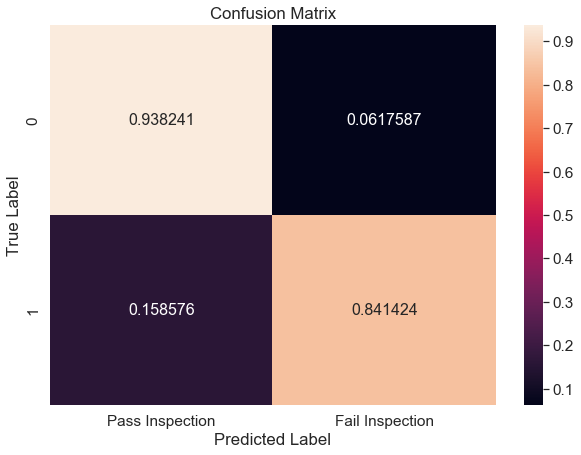

In [22]:
#Confusion matrix for SVM
cf_matrix2 = confusion_matrix(y_validate, best_svm_pred, normalize = "true")
df_cm2 = pd.DataFrame(cf_matrix, range(2), range(2))
df_cm2 = df_cm.rename(index=str, columns={0: "Pass Inspection", 1: "Fail Inspection"})

#Visualization
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
            annot_kws={"size": 16},
            fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 3.2 Model 3 - Decision Tree

##### Describe the basic logic and assumptions underlying each model, it's pros/cons, and why it is a plausible choice for this problem. 

Decision trees are regression and classification models that use branches to separate data into a series of outcomes or decisions at each node. It is known to be very simple and easy to understand. Decision trees are recursive and grow large, and must many times be “pruned” to make sure that features of low importance are removed.

The pros are that they are easy to understand, interpret, and visualize while also implicitly performing variable screening/feature selection (as you will see which branches are unimportant and do not contribute much to the explanatory power of the model). Additionally, decision trees handle both numerical and categorical data as well as multi-output problems. This makes them very robust, and they don’t take much pre-processing effort. The cons are that they can easily become overfitted as the trees become larger and more complex. Also, small upstream changes can lead to drastic downstream changes as the trees grow and grow (meaning the variance-bias trade off can be an issue and you need bagging or boosting to optimize the model). It is a challenge to figure out whether or not you are at a globally optimal minimum tree or just a local minimum, and the model can become highly biased if some classes dominate.

We chose this as one of the three models to evaluate because it is a simple, easy, and elegant model to run that does not need much outside effort. Additionally, it self-creates hyper tuning and validation routes as it can indicate which parts of the large trees to prune, and there are also a variety of tactics to deal with the bias-variance trade off.

Score value for decision tree: 0.9294809010773751


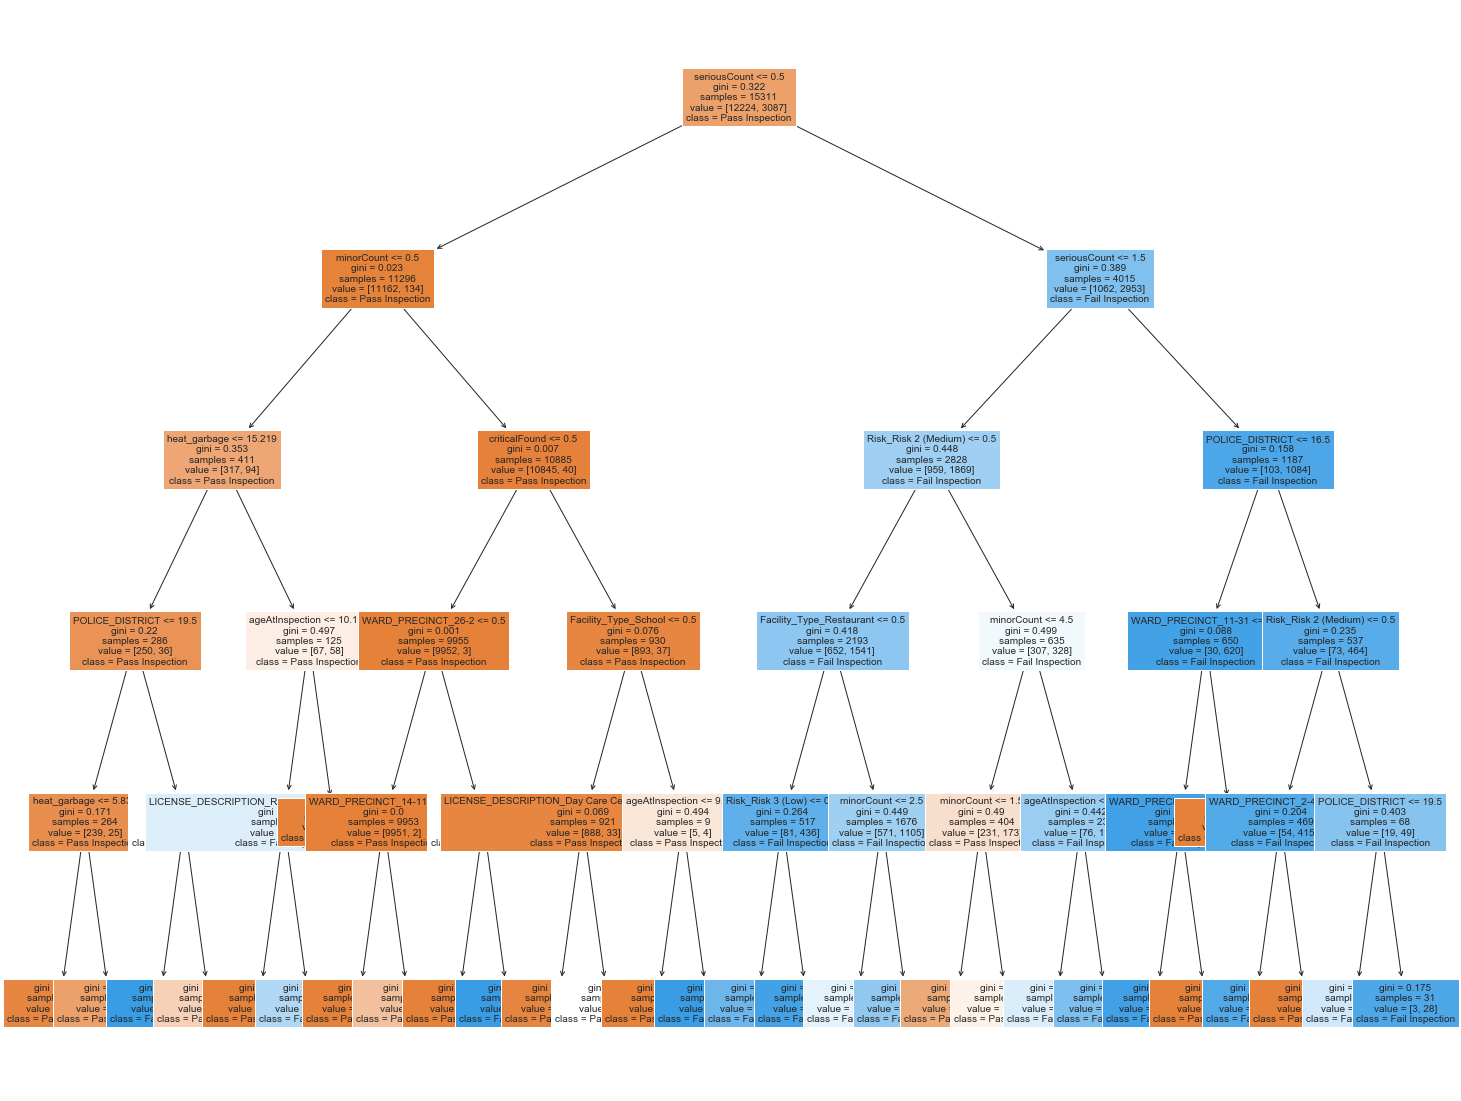

In [23]:
#Decision Tree Model
#Creating a decision tree classifier
dt_classifier = tree.DecisionTreeClassifier(criterion='gini',
                       splitter='best',
                       max_depth=5, 
                       min_samples_split=2,
                       min_samples_leaf=1,
                       min_weight_fraction_leaf=0.0,
                       max_features=None,
                       max_leaf_nodes=None,
                       min_impurity_decrease=1e-07,
                       random_state = 12345) #random seed

dt_classifier.fit(X, y)

dt_pred = dt_classifier.predict(X_validate)
score = accuracy_score(y_validate, dt_pred)
print("Score value for decision tree:",score)

#Visualization
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classifier, 
                   feature_names=X.columns,  
                   class_names=["Pass Inspection", "Fail Inspection"],
                   filled=True,
                   fontsize = 10)

In [24]:
#Hyperparameter tuning for Decision Tree
param_grid3 = {'min_samples_split': np.arange(2, 10), 
               'min_samples_leaf': np.arange(.05, .2), 
               'max_depth': np.arange(2, 5)}

dtc_grid = GridSearchCV(estimator = dt_classifier, 
                        param_grid = param_grid3, 
                        cv = 3,
                        scoring = accuracy_score, 
                        refit='precision',
                        n_jobs=-1)
dtc_grid.fit(X_train, y_train)

best_index = np.argmax(dtc_grid.cv_results_["mean_test_score"])
best_dtc_pred = dtc_grid.best_estimator_.predict(X_validate)

print("Optimal hyperparameters for DTC", dtc_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_dtc_pred, y_validate))

Optimal hyperparameters for DTC {'max_depth': 2, 'min_samples_leaf': 0.05, 'min_samples_split': 2}
Validation Accuracy 0.920666013712047


### 3.3 Validation Metrics

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [25]:
#Create for loop using cross_val_score to check validation metrics for logistic, svm, and decision classifier models 

for clf, label in zip([logit_grid.best_estimator_, svm_grid.best_estimator_, dtc_grid.best_estimator_], 
                      ['Logistic Regression', 'SVM', 'Decision Tree']):
    scores = cross_val_score(clf, X_validate, y_validate.ravel(), scoring='accuracy', cv=5)
    print('Accuracy: %0.4f [%s]' % (scores.mean(), label))
    scores = cross_val_score(clf, X_validate, y_validate.ravel(), scoring='precision', cv=5)
    print('Precision: %0.4f [%s]' % (scores.mean(), label))
    scores = cross_val_score(clf, X_validate, y_validate.ravel(), scoring='recall', cv=5)
    print('Recall: %0.4f [%s]' % (scores.mean(), label))
    scores = cross_val_score(clf, X_validate, y_validate.ravel(), scoring='f1', cv=5)
    print('F1: %0.4f [%s]' % (scores.mean(), label))  
    


Accuracy: 0.9141 [Logistic Regression]
Precision: 0.7618 [Logistic Regression]
Recall: 0.8414 [Logistic Regression]
F1: 0.7984 [Logistic Regression]
Accuracy: 0.7982 [SVM]
Precision: 0.0000 [SVM]
Recall: 0.0000 [SVM]
F1: 0.0000 [SVM]
Accuracy: 0.9207 [Decision Tree]
Precision: 0.7378 [Decision Tree]
Recall: 0.9466 [Decision Tree]
F1: 0.8286 [Decision Tree]


##### Discussion on Validation Metrics
Overall our decision tree model was better at prediction compared to the logistic regression and support vector machine models. Ignoring the SVM results (see footnote below), we find that the decision tree model outperformed the logistic model in accuracy, recall, and f1; the logistic regression model only did better on the precision assesment. In the context of prioritizing inspections, we would want to pay close attention to recall values when conducting predictive auditing because we are more concered with establishments that are at (higher) risk of failing and want to reduce false negatives. Since our data are imbalanced we need to go beyond accuracy which looks at the number of correct predictions regardless of direction divided by the total number of observations. Instead, recall looks at the number of positive class predictions made out of all positive examples in the dataset, in other words, how many establishments did we successfully predict as failing the health inspection that in reality belong to the "fail" inspection category. For that reason, we hold that the decision tree outperforms the rest.

**Note:** We are unsure why our SVM validation metrics for precision, recall, and F1 are 0. The fact that these results were generated through a for-loop and the other two models output reasonable values indicates that there's nothing wrong with the code, but rather there are inconsistencies with the attributes/properties of the SVM model relative to the other two.

## 4. Policy Simulation

### 4.1 Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

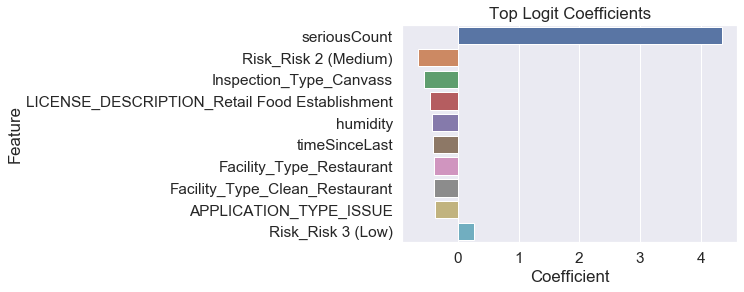

In [26]:
#Handling the Data for the Logistic Regression Model
logit_data = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logit_model.coef_))], axis = 1)
logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

#Visualizing the Logistic Regression Model
sns.barplot(x="Coefficient", y="Feature", data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

In [27]:
#SVM -- see confusion matrix in previous section (3.2)

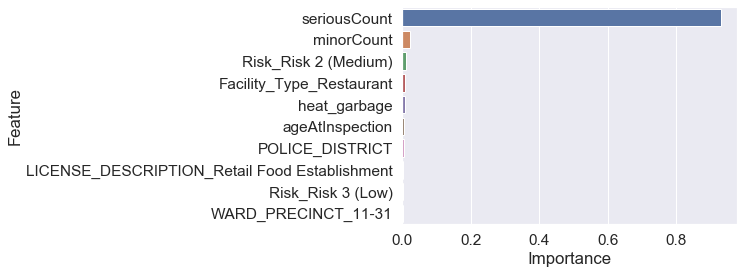

In [28]:
#Decision tree classifier feature importance plot 
dt_data = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(dt_classifier.feature_importances_))],
                    axis = 1)
dt_data.columns = ["Feature", "Importance"]

sns.barplot(x = "Importance", y = "Feature", data = dt_data.nlargest(10, 'Importance'))
plt.show()

For both the logistic regression model and decision tree classifier, we find that the serious count feature contributes the most to our predictions. Medium risk also contributes but not as strongly. While it might seem logical to remove serious count from the analyses due to its magnified influence on the predictions, we find that removing it from the models drastically drops the predictive strength of the models to something close to 15% overall. For that reason, we decided to leave the feature in all models.

It would be helpful to include additional features that are unmeasured but could contribute to an establishment passing/failing an inspection. For example, whether the kitchen staff are using personal protective equipment (PPE), how trash is disposed of, food expiration dates, and finally whether the establishment had any bug or rodent infestations in the past. 

### 4.2 Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

In [29]:
#Initialize the Random Forest model
rf_classifier = RandomForestClassifier(criterion='gini',  # or 'entropy' for information gain
                       max_depth=2,  # how deep tree nodes can go 
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=0.05,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,  # number of features to look for when splitting
                       max_leaf_nodes=None,  # max nodes
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 12345) #random seed


In [30]:
#Run the RF classifier using cross validation and output its accuracy
scores = cross_val_score(rf_classifier, X, y.ravel(), scoring='accuracy', cv=5)
print('Accuracy: %0.2f [Random Forest]' % (scores.mean()))

Accuracy: 0.92 [Random Forest]


In [31]:
#Predict outcomes and probabilities using random forest
probas = rf_classifier.fit(X, y.ravel()).predict_proba(X)[:,1]

In [32]:
#Created a copy of x and add inspection results and predicted probabilities as columns
probs_df = X.copy()
probs_df["Label"] = y.tolist()
probs_df["probs"] = probas.tolist()

#Sort probabilities in descending order 
probs_df.sort_values(by='probs', axis=0, ascending=False, inplace=True)

#Generate a list of 1000 riskiest establishments 
risky1000_df = probs_df.nlargest(1000, ['probs'])
risky1000_df

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
660225        CAPT'N NEMO                               0             2   
1098299       TAQUERIA  LA ZACATECANA                   1             2   
1326789       POLLO CAMPERO                             0             4   
1199148       TWISTED LIZARD                            4             2   
596433        VICEROY OF INDIA/ SAGAR                   0             4   
...                                                   ...           ...   
1158232       BERNARD MITCHELL HOSPITAL                 0             1   
1375765       PARKSIDE FOOD STORE INC                   0             1   
1335476       EL CAPITAN RESTAURANT                     0             1   
670261        FURAMA RESTAURANT INC                     5             1   
1114522       CAVANAUGH'S BAR & RESTAURANT              0             1   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
660225        CAPT'N NEMO                            9         0   
1098299       TAQUERIA  LA ZACATECANA                6         0   
1326789       POLLO CAMPERO                          6         0   
1199148       TWISTED LIZARD                         6         0   
596433        VICEROY OF INDIA/ SAGAR                7         0   
...                                                ...       ...   
1158232       BERNARD MITCHELL HOSPITAL              5         0   
1375765       PARKSIDE FOOD STORE INC                6         0   
1335476       EL CAPITAN RESTAURANT                  5         1   
670261        FURAMA RESTAURANT INC                  8         0   
1114522       CAVANAUGH'S BAR & RESTAURANT           5         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
660225        CAPT'N NEMO                              0            0   
1098299       TAQUERIA  LA ZACATECANA                  0            0   
1326789       POLLO CAMPERO                            1            0   
1199148       TWISTED LIZARD                           0            0   
596433        VICEROY OF INDIA/ SAGAR                  0            0   
...                                                  ...          ...   
1158232       BERNARD MITCHELL HOSPITAL                0            0   
1375765       PARKSIDE FOOD STORE INC                  0            0   
1335476       EL CAPITAN RESTAURANT                    0            3   
670261        FURAMA RESTAURANT INC                    0            0   
1114522       CAVANAUGH'S BAR & RESTAURANT             0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
660225        CAPT'N NEMO                           0       2.000000   
1098299       TAQUERIA  LA ZACATECANA               0       2.000000   
1326789       POLLO CAMPERO                         3       0.452055   
1199148       TWISTED LIZARD                        0       2.000000   
596433        VICEROY OF INDIA/ SAGAR               0       2.000000   
...                                               ...            ...   
1158232       BERNARD MITCHELL HOSPITAL             0       2.000000   
1375765       PARKSIDE FOOD STORE INC               3       1.304110   
1335476       EL CAPITAN RESTAURANT                 7       1.079452   
670261        FURAMA RESTAURANT INC                 0       2.000000   
1114522       CAVANAUGH'S BAR & RESTAURANT          0       2.000000   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
660225        CAPT'N NEMO                             1             24.0   
1098299       TAQUERIA  LA ZACATECANA                 1             

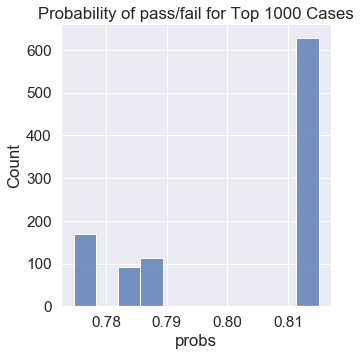

In [33]:
#Plot distribution of pass/fail among first 1000 observations 
risky1000_df= probs_df.nlargest(1000,['probs']) 

sns.displot(risky1000_df, x="probs", color='b')

plt.title("Probability of pass/fail for Top 1000 Cases")
plt.show()

In [34]:
#Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

random1000_df = probs_df.sample(1000)
random1000_df

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                        
1387222       ZIZI'S KABOBS                                 0             1   
1393253       GANNON'S PUB                                  0             0   
521917        LITTLE CAESARS PIZZA TREAT #1627              0             0   
1383218       SHAMBLES BAR                                  0             2   
1150977       NAS FOOD MARKETET, INC                        0             0   
...                                                       ...           ...   
509426        ALCATRACES                                    0             0   
1118281       WALGREENS #147                                0             1   
1369373       ROADHOUSE 66                                  0             2   
598548        TORTERIA LAS FUTBOLERAS                       0             0   
1343314       SUPERMERCADO GUERRERO                         0             0   

                                                minorCount  pastFail  \
Inspection_ID DBA_Name                                                 
1387222       ZIZI'S KABOBS                              5         0   
1393253       GANNON'S PUB                               5         0   
521917        LITTLE CAESARS PIZZA TREAT #1627           5         0   
1383218       SHAMBLES BAR                               6         0   
1150977       NAS FOOD MARKETET, INC                     4         0   
...                                                    ...       ...   
509426        ALCATRACES                                 0         0   
1118281       WALGREENS #147                             3         0   
1369373       ROADHOUSE 66                               6         1   
598548        TORTERIA LAS FUTBOLERAS                    3         0   
1343314       SUPERMERCADO GUERRERO                      4         0   

                                                pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                      
1387222       ZIZI'S KABOBS                                0            0   
1393253       GANNON'S PUB                                 0            0   
521917        LITTLE CAESARS PIZZA TREAT #1627             0            0   
1383218       SHAMBLES BAR                                 0            0   
1150977       NAS FOOD MARKETET, INC                       0            0   
...                                                      ...          ...   
509426        ALCATRACES                                   0            0   
1118281       WALGREENS #147                               0            0   
1369373       ROADHOUSE 66                                 3            2   
598548        TORTERIA LAS FUTBOLERAS                      0            0   
1343314       SUPERMERCADO GUERRERO                        0            0   

                                                pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                     
1387222       ZIZI'S KABOBS                             0       2.000000   
1393253       GANNON'S PUB                              9       1.172603   
521917        LITTLE CAESARS PIZZA TREAT #1627          0       2.000000   
1383218       SHAMBLES BAR                              0       2.000000   
1150977       NAS FOOD MARKETET, INC                    0       2.000000   
...                                                   ...            ...   
509426        ALCATRACES                                0       2.000000   
1118281       WALGREENS #147                            0       2.000000   
1369373       ROADHOUSE 66                             10       1.391781   
598548        TORTERIA LAS FUTBOLERAS                   0       2.000000   
1343314       SUPERMERCADO GUERRERO                     9       0.512329   

                                                firstRecord  POLICE_DISTRICT  \
Inspection_I

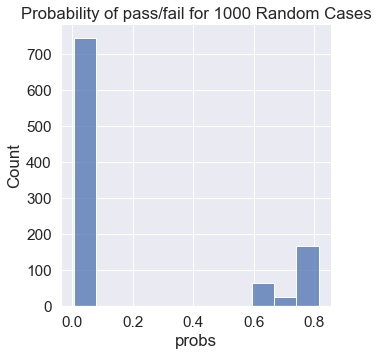

In [35]:
#Plot distribution of 1000 random observations

sns.displot(random1000_df, x="probs")

plt.title("Probability of pass/fail for 1000 Random Cases")
plt.show()

Our 1000 riskiest establishments had a higher probability of failing inspections compared to our 1000 randomly selected establishments. This is logical given that the riskiest establishments would be more likely to fail the health inspection.

### 4.3 Predict on Data with Unseen Labels

In [36]:
#Inspect 2014 data

print("Number of rows and columns of 2014 data:",chicago_inspections_2014.shape) #check the shape of the data
chicago_inspections_2014.head()

Number of rows and columns of 2014 data: (4623, 74)


Inspection_ID Inspection_Date                    DBA_Name  \
0         920444      2014-01-15  GALLISTEL LANGUAGE ACADEMY   
1         920445      2014-02-03                      SUBWAY   
2         920446      2014-02-03       SHARKS FISH & CHICKEN   
3         920448      2014-03-07              P K PETRO INC.   
4         920449      2014-03-07     Z T DOLLAR EXCHANGE,INC   

                     AKA_Name  License  Facility_Type             Risk  \
0  GALLISTEL LANGUAGE ACADEMY  2046708         School    Risk 1 (High)   
1                      SUBWAY  2183563     Restaurant    Risk 1 (High)   
2       SHARKS FISH & CHICKEN  1477112     Restaurant  Risk 2 (Medium)   
3                    MARATHON  1331469  Grocery Store     Risk 3 (Low)   
4                DOLLAR STORE  2189299  Grocery Store     Risk 3 (Low)   

                    Address     City State      Zip Inspection_Type  \
0         10200 S AVENUE J   CHICAGO    IL  60617.0         Canvass   
1          4025 E 106TH ST   CHICAGO    IL  60617.0         Canvass   
2           2027 E 95TH ST   CHICAGO    IL  60617.0         Canvass   
3  7001 S STONY ISLAND AVE   CHICAGO    IL  60649.0         Canvass   
4           2429 E 72ND ST   CHICAGO    IL  60649.0         Canvass   

    Latitude  Longitude                                 Location  \
0  41.709957 -87.534223   (41.70995714781606, -87.5342225149751)   
1  41.702577 -87.525872  (41.70257660937248, -87.52587169711877)   
2  41.722372 -87.574275  (41.72237211196818, -87.57427469548966)   
3  41.767798 -87.585820  (41.76779762303839, -87.58581991823232)   
4  41.764339 -87.565371  (41.764339216775696, -87.5653706801239)   

  Facility_Type_Clean  criticalCount  seriousCount  minorCount  pass_flag  \
0               Other              0             1           5          0   
1          Restaurant              2             0           0          0   
2          Restaurant              0             0           6          1   
3               Other              0             1           7          0   
4               Other              1             2           5          0   

   fail_flag  pastFail  pastCritical  pastSerious  pastMinor  timeSinceLast  \
0          1         0             0            0          2       0.964384   
1          0         0             0            0          0       0.794521   
2          0         0             0            0          2       0.660274   
3          1         0             0            0          0       2.000000   
4          1         0             0            0          0       2.000000   

   firstRecord                ID  LICENSE_ID  ACCOUNT_NUMBER  \
0            0               NaN         NaN             NaN   
1            0  2183563-20120829   2183563.0        375027.0   
2            0  1477112-20120716   2155150.0        273266.0   
3            1  1331469-20121216   2194284.0        257899.0   
4            1  2189299-20121009   2189299.0        249904.0   

                 LEGAL_NAME     DOING_BUSINESS_AS_NAME  \
0                       NaN                        NaN   
1              AMI SUB INC.                     SUBWAY   
2        A & K SHARKS, INC.      SHARKS FISH & CHICKEN   
3            P K PETRO INC.                Stony Shell   
4  ZT DOLLAR EXCHANGE, INC.  Z T DOLLAR EXCHANGE, INC.   

                   ADDRESS     CITY STATE  ZIP_CODE  WARD  PRECINCT  \
0                      NaN      NaN   NaN       NaN   NaN       NaN   
1        4025 E 106TH ST 1  CHICAGO    IL   60617.0  10.0      38.0   
2           2027 E 95TH ST  CHICAGO    IL   60617.0   7.0      49.0   
3  7001 S STONY ISLAND AVE  CHICAGO    IL   60649.0   5.0      21.0   
4           2429 E 72ND ST  CHICAGO    IL   60649.0   7.0      40.0   

  WARD_PRECINCT  POLICE_DISTRICT  LICENSE_CODE        LICENSE_DESCRIPTION  \
0           NaN              NaN           NaN                        NaN   
1         10-38              4.0        1006.0  Retail Food Establishment   
2      

In [37]:
#Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                                'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                'LICENSE_TERM_START_DATE',
                                                'LICENSE_TERM_EXPIRATION_DATE',
                                                'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [38]:
#Also drop datetime info
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                                                           'minDate',
                                                                           'maxDate'],
                                                                          axis = 1)

In [39]:
#Double check the shape to see that the columns and rows with Nan were dropped
chicago_inspections_2014.shape

(3937, 38)

In [40]:
#Only keep columns in common between the two datasets

X_test = chicago_inspections_2014[chicago_inspections_2014.columns & X.columns]
X_test

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                               
920445        SUBWAY                               2             0   
920446        SHARKS FISH & CHICKEN                0             0   
920448        P K PETRO INC.                       0             1   
920449        Z T DOLLAR EXCHANGE,INC              1             2   
920450        KENNEDY FISH & CHICKEN               0             1   
...                                              ...           ...   
1506243       CENTRAL GYROS CORP                   0             0   
1506245       TORTILLA SOUP                        0             0   
1506247       GROTA RESTAURANT                     0             0   
1508207       R U HUNGRY?                          0             0   
1513208       EL RANCHITO FOOD                     0             0   

                                       minorCount  pastFail  pastCritical  \
Inspection_ID DBA_Name                                                      
920445        SUBWAY                            0         0             0   
920446        SHARKS FISH & CHICKEN             6         0             0   
920448        P K PETRO INC.                    7         0             0   
920449        Z T DOLLAR EXCHANGE,INC           5         0             0   
920450        KENNEDY FISH & CHICKEN            7         0             0   
...                                           ...       ...           ...   
1506243       CENTRAL GYROS CORP                6         0             0   
1506245       TORTILLA SOUP                     4         0             0   
1506247       GROTA RESTAURANT                  4         0             0   
1508207       R U HUNGRY?                       1         0             0   
1513208       EL RANCHITO FOOD                  8         0             0   

                                       pastSerious  pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                         
920445        SUBWAY                             0          0       0.794521   
920446        SHARKS FISH & CHICKEN              0          2       0.660274   
920448        P K PETRO INC.                     0          0       2.000000   
920449        Z T DOLLAR EXCHANGE,INC            0          0       2.000000   
920450        KENNEDY FISH & CHICKEN             0          3       0.964384   
...                                            ...        ...            ...   
1506243       CENTRAL GYROS CORP                 0          7       0.715068   
1506245       TORTILLA SOUP                      0          7       0.580822   
1506247       GROTA RESTAURANT                   0          8       0.465753   
1508207       R U HUNGRY?                        0          2       0.613699   
1513208       EL RANCHITO FOOD                   0          4       0.904110   

                                       firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                
920445        SUBWAY                             0              4.0   
920446        SHARKS FISH & CHICKEN              0              4.0   
920448        P K PETRO INC.                     1              3.0   
920449        Z T DOLLAR EXCHANGE,INC            1              3.0   
920450        KENNEDY FISH & CHICKEN             0              3.0   
...                                            ...              ...   
1506243       CENTRAL GYROS CORP                 0             25.0   
1506245       TORTILLA SOUP                      0             16.0   
1506247       GROTA RESTAURANT                   0             25.0   
1508207       R U HUNGRY?                        0              9.0   
1513208       EL RANCHITO FOOD                   0              8.0   

                                       ageAtInspection  \
Inspection_ID DBA_Name                                   
920445        SUBWAY                         

In [41]:
#Create dummies for all other features in X_test

X_test = pd.get_dummies(chicago_inspections_2014)
X_test.shape

(3937, 1264)

In [42]:
#Re-train model using a reduced dataset (only features in common between both datasets)

#Identify common_columns between X and X_test sets
common_cols = [col for col in set(X.columns).intersection(X_test.columns)]

#Created X_reduced with only columns in common between X and X_test sets
X_reduced = X[common_cols]
X_reduced.shape

(15311, 1227)

In [43]:
#Keep common_columns for X_reduced and X_test sets
X_test = X_test[common_cols]
X_test.shape

(3937, 1227)

In [44]:
#Create the reduced training and validation sets
X_reduced_train, X_reduced_validate, y_train, y_validate = train_test_split(X_reduced, y, train_size = .80, test_size=0.20, stratify=y)

In [45]:
#See the shapes of the reduced training and validation sets 
print("Shape of X_reduced_train is", X_reduced_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_reduced_validate is", X_reduced_validate.shape)
print("Shape of y_validate is", y_validate.shape)

Shape of X_reduced_train is (12248, 1227)
Shape of y_train is (12248, 1)
Shape of X_reduced_validate is (3063, 1227)
Shape of y_validate is (3063, 1)


Score value for decision tree: 0.9164218086842965


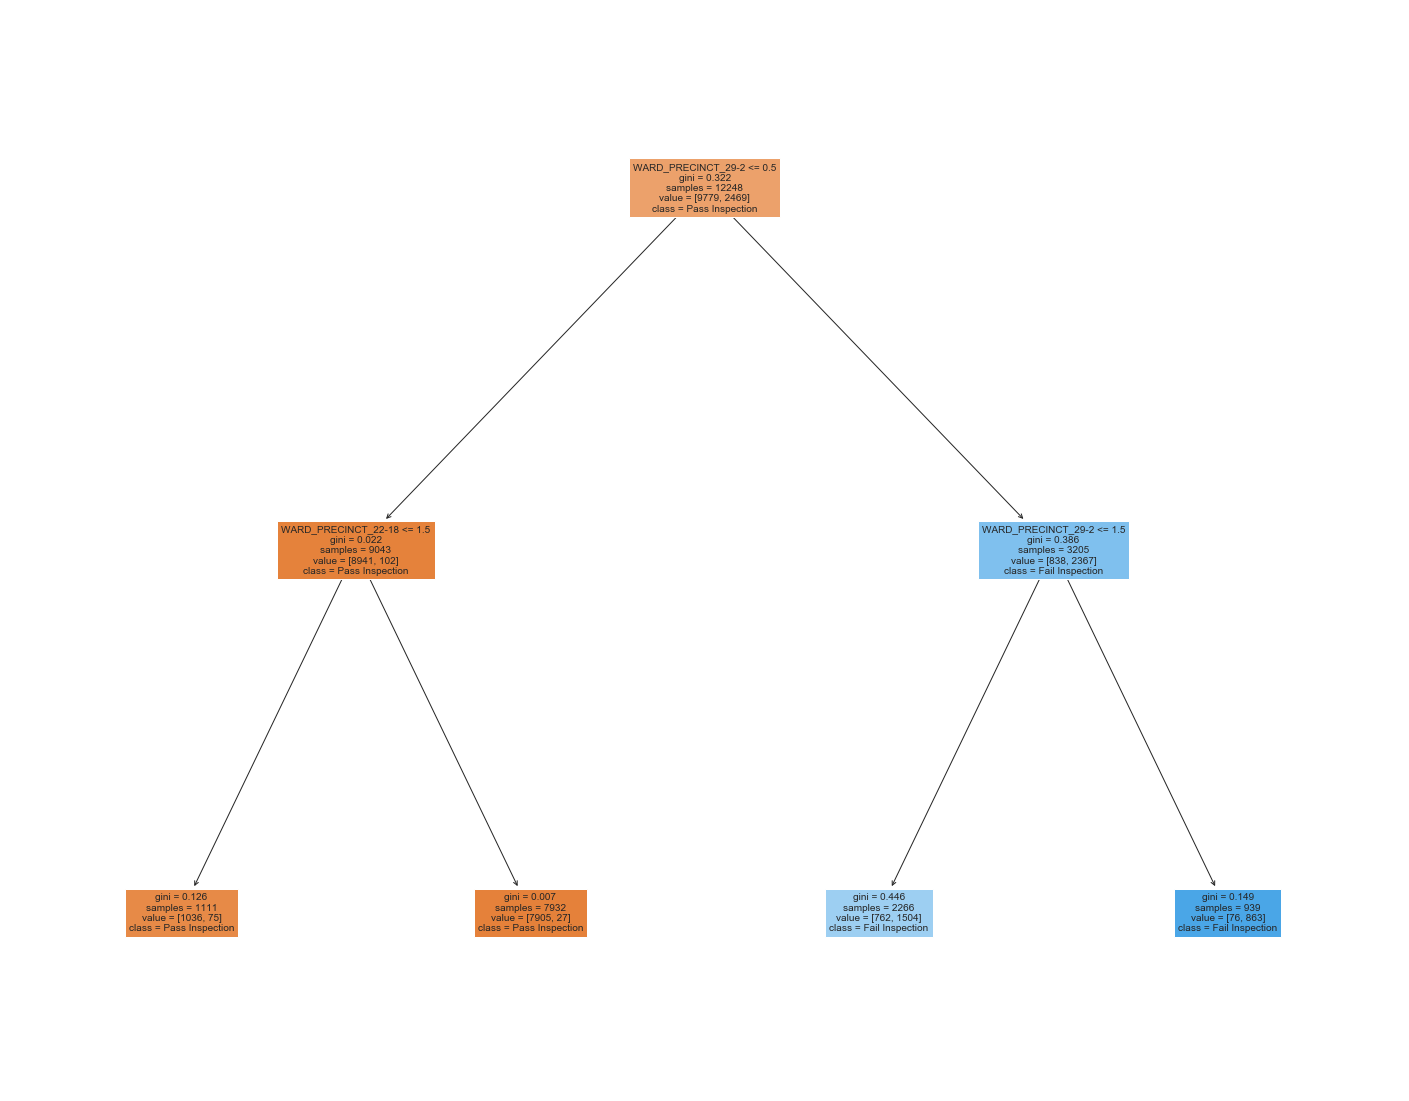

In [46]:
#Re-train our decision tree model with the reduced dataset and the tuned hyperparameters

#Creating a decision tree classifier
dt_classifier = tree.DecisionTreeClassifier(criterion='gini',
                       splitter='best',
                       max_depth=2, 
                       min_samples_split=2,
                       min_samples_leaf=0.05,
                       min_weight_fraction_leaf=0.0,
                       max_features=None,
                       max_leaf_nodes=None,
                       min_impurity_decrease=1e-07,
                       random_state = 12345) #random seed

#Fit the decision tree on the reduced training set 
dt_classifier.fit(X_reduced_train, y_train)

#Predict our model on the reduced validation set 
dt_pred2 = dt_classifier.predict(X_reduced_validate)
score = accuracy_score(y_validate, dt_pred2)
print("Score value for decision tree:",score)

#Visualization
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classifier, 
                   feature_names=X.columns,  
                   class_names=["Pass Inspection", "Fail Inspection"],
                   filled=True,
                  fontsize = 10)

In [47]:
#Predict outcomes and probabilities of the test set (2014 data)
dt_test_pred = dt_classifier.predict(X_test)

In [48]:
#Save predictions on in a file called predictions.csv
predictions = pd.DataFrame(dt_test_pred)
predictions.to_csv('Team1_predictions.csv', index= False)

From a policy perspective, it is still essential to examine the recall validation metric because it does a better job quantifying the number of failed establishments accurately. Furthermore, false negatives are more risky from a public health perspective. Auditing an unsafe establishment is necessary and if there is slight over-auditing - although this could be more financially expensive to audit - it would not cause harm to people's health and safety. However, under-auditing would cause more harm and possibly cause other establishments to be more lax about the cleanliness and safety of their establishment. 

## 5. Discussion Questions

### 5.1 *Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?*

Accuracy values indicate, in a general sense, the ration of correct predictions to incorrect ones. However, this form of assessing our performance can be deceptive. That is, it doesn't tell us much about the predictive performance at a granular level, considering all categories. For instance, imagine we collect information regarding hobbies, work schedules, books read, and other leisure activities from 100 mathematicians and 100 contemporary artists. If we mis-predict the careers of 10 mathematicians and 10 artists, our accuracy level is 90%, a value that is representative of both categories. On the other hand, if we're trying to predict the professions of 20 mathematicians and 180 contemporary artists using the same features, but only predict 2 mathematicians correctly while predicting 178 contemporary artists correctly, we still have an overall accuracy of 90%. But if we look closer at each category, we'd see that we're predicting artists' profession correctly 99% of the time while predicting mathematicians' career correctly only 10% of the time. Such an unbalanced distribution of the data in the two groups can lead to general accuracy levels that are deceptive of our performance for each category.

For that reason, we can use other methods for assessing our performance, including "precision" and "recall". In short, precision (measured by dividing the number of correct predictions of the positive category by the total number of predictions of the positive category) tells us how well the algorithm performed with the observations predicted to be positive. And recall (measured by dividing the number of correct predictions of the positive category by the sum of the correct predictions of the positive category and the incorrect predictions of the negative category) tells us how well the algorithm performed when predicting the label for all observations that in reality belong to the positive category.

However, there is a trade-off between recall and precision. If we move the prediction needle to improve one of the assessment metrics, this will negatively affect the other metric. For that reason, we can use other forms of assessing accuracy such as the F1 score. This metric is calculated as follows:

$$
F1 = 2 * \frac{precision * recall}{precision + recall}
$$

F1 scores help us optimize the trade-off between precision and recall because the numerator automatically penalizes either a low precision or recall value. That is, it provides equal weight to both metrics. Nonetheless, it is possible that for different projects we might want/need to prioritize one of the metrics, making F1 scores not appropriate for such cases.

### 5.2 *Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?* 

It would be necessary for policymakers to test alternative features (not currently examined) that establishments are unaware of as part of their algorithmic decisionmaking. This would make sure that there are other indicators that are predictive if establishments do in fact adjust their behaviors. Additionally, it would be beneficial to randomly select and assess a number of establishments outside of the algorithm to account for any algorithmic error. This approach would both keep establishments alert that they could be randomly chosen for auditing and would improve the predictive power of the algorithm over time. 